<a href="https://colab.research.google.com/github/poojitha-135/NNDL/blob/main/exp2(nndl).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter test image index: 3


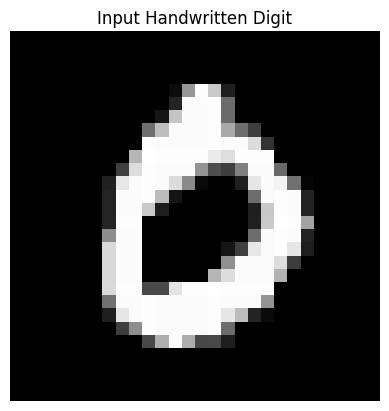

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Digit: 0
Actual Digit: 0


In [5]:
#2a. single handwritten digit
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0
# Model creation
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train model
model.fit(X_train, y_train, epochs=8, verbose=0)
# User input
idx = int(input("Enter test image index: "))
# Display image
plt.imshow(X_test[idx], cmap='gray')
plt.title("Input Handwritten Digit")
plt.axis('off')
plt.show()
# Predict
pred = model.predict(X_test[idx].reshape(1, 28, 28))
print("Predicted Digit:", np.argmax(pred))
print("Actual Digit:", y_test[idx])


Enter image index: 35


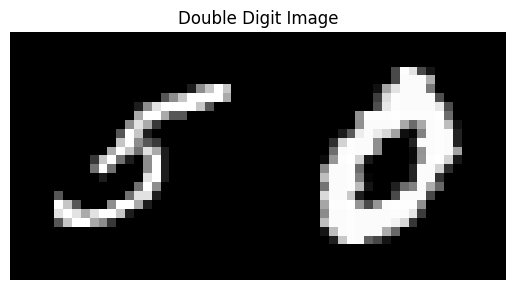

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Digit: 5
Actual Digit: 5


In [6]:
#2b.Double Digit Recognition
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# Load MNIST dataset
(X_train, y_train), _ = mnist.load_data()
# Prepare combined images
combined_images = []
combined_labels = []
for i in range(6000):
    left_digit = X_train[i]
    right_digit = X_train[i + 2]
    merged = np.concatenate((left_digit, right_digit), axis=1)
    combined_images.append(merged)
    combined_labels.append(y_train[i])
# Convert to arrays and normalize
combined_images = np.array(combined_images) / 255.0
combined_labels = np.array(combined_labels)
# Build neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 56)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train model
model.fit(combined_images, combined_labels, epochs=8, verbose=0)
# User input
index = int(input("Enter image index: "))
# Display combined image
plt.imshow(combined_images[index], cmap='gray')
plt.title("Double Digit Image")
plt.axis('off')
plt.show()
# Predict digit
sample = combined_images[index].reshape(1, 28, 56)
prediction = model.predict(sample)
print("Predicted Digit:", np.argmax(prediction))
print("Actual Digit:", combined_labels[index])